In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import cv2

In [2]:
#SVD algorithms
def calculate_eigh_ATA(A):
    '''
        Calculate the eigenvalues and eigenvectors of matrix A^T.A 
        Arguments:
            A: numpy array - the image
        Returns:
            eigenvalues: numpy array
            eigenvectors: numpy array
    '''
    ATA = np.dot(A.T, A)
    eigenvalues, eigenvectors = la.eigh(ATA)
    eigenvalues = np.maximum(eigenvalues, 0.)

    #sort descending
    sorted_index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_index]
    eigenvectors = eigenvectors[:, sorted_index]

    return eigenvalues, eigenvectors

def calculate_svd(A):
    '''
        Using SVD to calculate U, sigma and V^T matrices of matrix A
        Arguments:
            A: numpy array - the image
        Returns:
            U: numpy array
            sigma: numpy array
            V_T: numpy array
    '''
    m = A.shape[0]
    n = A.shape[1]

    #check to know calculate U or V^T first
    if m >= n:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A.T)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)

        U = eigenvectors

        V = np.zeros([n, n])
        for i in range(n):
            V[:, i] = np.dot(A.T, U[:, i]) / sigma[i][i]
        V_T = V.T
    else:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)

        V = eigenvectors
        V_T = V.T

        U = np.zeros([m, m])
        for i in range(m):
            U[:, i] = np.dot(A, V[:, i]) / sigma[i][i]

    return U, sigma, V_T


def find_A_approx(A, rank):
    '''
        Calculate the matrix A_approximately of A with rank using SVD
        Arguments:
            A: numpy array - the image
            rank: int - the rank of the approximate matrix, 
                the greater the rank is the more accuracy the approximate image is
        Returns:
            result: numpy array - the approximately image
            error: float - the error of the approximate image
    '''
    U, sigma, V_T = calculate_svd(A)
    #approximate matrix with rank
    new_A = U[:, :rank] @ sigma[:rank, :rank] @ V_T[:rank, :]
    #calculate error
    if rank < min(A.shape[0], A.shape[1]):
      error = np.sum(sigma[rank:, :])/ np.sum(sigma)
    else: 
      error = 0.
    return new_A, error

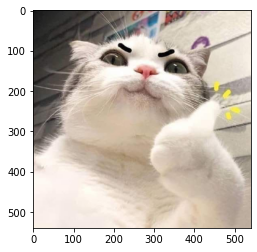

In [3]:
#load image
default_image = cv2.imread('image1.jpg')
#because image after load by cv2.imread is BGR, we need to convert to RGB
default_image = cv2.cvtColor(default_image, cv2.COLOR_BGR2RGB)
plt.imshow(default_image)
plt.show()

In [4]:
#image'shape
default_image.shape

(540, 540, 3)

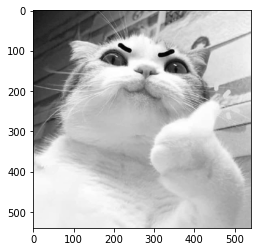

In [5]:
#convert image to gray image
gray_image = cv2.cvtColor(default_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap = 'gray')
plt.show()

In [6]:
#image's shape after convert to gray
gray_image.shape

(540, 540)

In [7]:
#convert image to matrix to compress
gray_image = np.array(gray_image)
gray_image

array([[ 17,  18,  19, ..., 233, 233, 233],
       [ 20,  20,  21, ..., 233, 233, 233],
       [ 24,  24,  24, ..., 233, 233, 233],
       ...,
       [244, 244, 244, ..., 179, 179, 179],
       [244, 244, 244, ..., 179, 179, 179],
       [244, 244, 244, ..., 179, 179, 179]], dtype=uint8)

In [8]:
#scale
gray_image = gray_image/255. 
gray_image

array([[0.06666667, 0.07058824, 0.0745098 , ..., 0.91372549, 0.91372549,
        0.91372549],
       [0.07843137, 0.07843137, 0.08235294, ..., 0.91372549, 0.91372549,
        0.91372549],
       [0.09411765, 0.09411765, 0.09411765, ..., 0.91372549, 0.91372549,
        0.91372549],
       ...,
       [0.95686275, 0.95686275, 0.95686275, ..., 0.70196078, 0.70196078,
        0.70196078],
       [0.95686275, 0.95686275, 0.95686275, ..., 0.70196078, 0.70196078,
        0.70196078],
       [0.95686275, 0.95686275, 0.95686275, ..., 0.70196078, 0.70196078,
        0.70196078]])

In [9]:
#find approximate matrix by SVD and its max rank
U, sigma, V_T = calculate_svd(gray_image)
max_rank = la.matrix_rank(sigma)

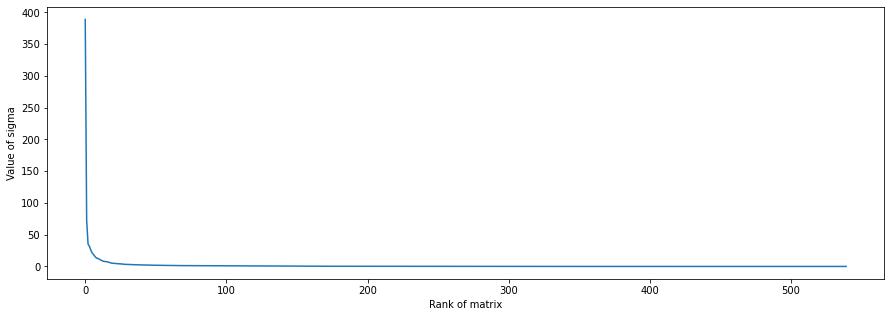

In [10]:
#show rank of about 50 to the end not affected so much
x_values = list(range(max_rank))
y_values = list(sigma[i][i] for i in x_values)
plt.figure(figsize=(15,5))
plt.plot(x_values, y_values)
plt.xlabel('Rank of matrix')
plt.ylabel('Value of sigma')
plt.show()

In [11]:
#find rank of approximate matrix has an error less than 10%.
for rank in range(1, max_rank):
    approx_image, error= find_A_approx(gray_image, rank)
    if error < 0.1:
        break

In [12]:
#the error less than 10% with rank 66
rank

66

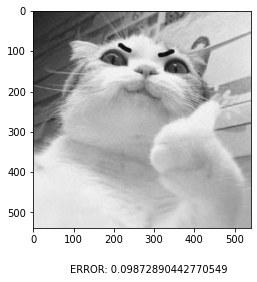

In [13]:
approx_image, error= find_A_approx(gray_image, 66)
approx_image *= 255
plt.text(90, 650, "ERROR: " + str(error))
plt.imshow(approx_image, cmap = 'gray')
plt.show()

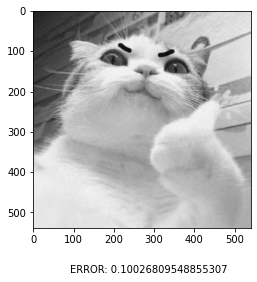

In [14]:
approx_image, error= find_A_approx(gray_image, 65)
approx_image *= 255
plt.text(90, 650, "ERROR: " + str(error))
plt.imshow(approx_image, cmap = 'gray')
plt.show()